### Question 01

#### Question 01

- 1-1 : a. 로그수집
- 1-2 : f. 크롤링
- 1-3 : c. 오픈API
- 1-4 : h. 센서수집

#### Question 01

- 크롤링이란?
    -> 데이터를 수집하고 분석하는 것을 말한다
    -> 스크랩핑(혹은 웹 스크랩핑)은 인터넷에서 존재하는 데이터를 컴퓨터 프로그램을 통하여 자동화된 방법으로 웹에서 데이터를 수집하는 모든 작업을 말한다.
    
- 크롤링의 필요성
    -> 자동으로 대량의 정보를 수집할 수 있다
    -> 다양한 대화 지식이 필요한 챗봇 구현이나 빅데이터 분석 연구에도 활용할 수 있다

#### Question 03

- BeautifulSoup이란?
    - 웹 문서 안에 있는 데이터를 추출할 수 있도록 함수를 제공해주는 모듈이다.
    - 1. req를 통해서 html 정보를 받아옴 (데이터정보 - 텍스트) --> 파이썬객체로 변환한다.
    - 2. bs 제공하는 함수를 통해 원하는 태그의 정보에 접근하여 데이터를 추출할 수 있다.

#### Question 04

- 1번은 element, 2번은 elements를 사용했다. element는 하나의 요소를 찾고, element뒤에 s가 붙었을때는 다수의 요소들을 찾을 수 있다.

#### Question 05

- 1-1 : 'p > #this_span'
- 1-2 : .text

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Question 02

In [1]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [2]:
url = 'https://www.naver.com/'

In [3]:
driver = wb.Chrome()
driver.get(url)

In [4]:
driver.find_element(By.CSS_SELECTOR, value = '#query').send_keys('크롤링\n')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Question 03

In [5]:
url = 'https://corners.gmarket.co.kr/BestSellers'
driver = wb.Chrome()
driver.get(url)

In [6]:
g_best = driver.find_element(By.CSS_SELECTOR, value='.best-list > ul > li:first-child > .itemname').text
g_best
bb = driver.find_element(By.CSS_SELECTOR, value='.best-list > ul > li:first-child > .item_price > .s-price > strong > span').text
bb

'19,900원'

In [7]:
bTitle_lst = []
bPrice_lst = []
bRank_lst = []

for i in range(1, 21):
    bTitle_lst.append(driver.find_element(By.CSS_SELECTOR, value=f'.best-list > ul > li:nth-child({i}) > .itemname').text)
    bPrice_lst.append(driver.find_element(By.CSS_SELECTOR, value=f'.best-list > ul > li:nth-child({i}) > .item_price > .s-price > strong > span').text)
    bRank_lst.append(i)

In [8]:
import pandas as pd

In [9]:
g_dict = {'Best순위':bRank_lst, '베스트상품':bTitle_lst, '가격':bPrice_lst}
g_df = pd.DataFrame(g_dict)
g_df2 = g_df.set_index('Best순위')
g_df2

,베스트상품,가격
Best순위,,
1,[널담]널담은뚱카롱/마카롱 /8구 2박스 16개입/크리스마스 에디션,"19,900원"
2,[메가박스](스마일클럽)일반예매권2D-주중/주말,"8,500원"
3,[웅진]빅토리아 탄산수 청귤+플레인500ml 40펫,"17,700원"
4,연동마을 달달하고 고소한 삼기 꿀고구마 10kg(특상중),"23,500원"
5,[이디야커피]이디야 스페셜 골드블렌드 커피믹스 200T,"22,900원"
6,CJ제일제당 고메 함박스테이크 X 10개,"20,460원"
7,특가) 하남쭈꾸미 500g 4팩,"45,800원"
8,[고등어밥상]고등어밥상 가시제거 노르웨이 순살 대자 고등어 총 28개 4kg,"65,900원"
9,[하늘보리]하늘보리 친환경 무라벨 ECO 1.5L12페트,"14,100원"


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Question 04

In [10]:
import requests as req
from bs4 import BeautifulSoup as bs
header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}

In [11]:
melon_url = 'https://www.melon.com/chart/index.htm'
res = req.get(melon_url, headers = header)

In [12]:
melon_html = bs(res.text, 'lxml')
melon_html

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

In [13]:
song_cnt = 0
song = melon_html.select('.rank01 > span > a')

for i in range(100):
    song_txt = song[i].text
    song_cnt += 1
    print(song_txt)
    
singer_cnt = 0
singer = melon_html.select('.rank02')

for i in range(100):
    singer_txt = singer[i].text
    singer_cnt += 1
    print(singer_txt)

Ditto
사건의 지평선
Candy
Hype boy
NOT SORRY (Feat. pH-1) (Prod. by Slom)
ANTIFRAGILE
사랑은 늘 도망가
마이웨이 (MY WAY) (Prod. R.Tee)
After LIKE
우리들의 블루스
Attention
Nxde
다시 만날 수 있을까
Snowman
London Boy
All I Want for Christmas Is You
Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (Feat. FIFA Sound)
새삥 (Prod. ZICO) (Feat. 호미들)
Polaroid
무지개
이제 나만 믿어요
Graduation
아버지
LOVE DIVE
A bientot
손이 참 곱던 그대
Monologue
인생찬가
사랑해 진짜
눈 (EYE) (Feat. BIG Naughty, 저스디스 (JUSTHIS)) (Prod. R.Tee)
연애편지
Santa Tell Me
Tangerine Love (Favorite)
문 (Moon)
발자국 (Walk With You)
입김 (Take My Breath)
보금자리
Rush Hour (Feat. j-hope of BTS)
Shut Down
잘가요
미리 메리 크리스마스 (Feat. 천둥 Of MBLAQ)
Last Christmas
해요 (2022)
크리스마스니까
Pink Venom
WHEN I MOVE
너의 모든 순간
첫 눈
그 겨울이 잠든 거리에서
그대를 알고
자격지심 (Feat. ZICO)
나침반 (Feat. UNEDUCATED KID, 수퍼비 (SUPERBEE)) (Prod. R.Tee)
Cookie
사랑인가 봐
오르골 (Life Is Still Going On)
위하여 (We Higher) (Prod. GroovyRoom)
딱 10CM만
그때 그 순간 그대로 (그그그)
내가 아니라도
TOMBOY
JOY
Beatbox
그라데이션
정이라고 하자 (Feat. 10CM)
우린 그렇게 사랑해서
취중고백

In [14]:
song = melon_html.select('.ellipsis.rank01 a')
singer = melon_html.select('.checkEllipsis')
# print(len(song), len(singer))

song_txt = []
singer_txt = []
rank_lst = []
for i in range(len(song)):
    rank_lst.append(i+1)
    song_txt.append(song[i].text)
    singer_txt.append(singer[i].text)
print(len(song_txt), len(singer_txt))

100 100


In [15]:
melon_dict = {'순위':rank_lst, '노래제목':song_txt, '가수명':singer_txt}
melon_df = pd.DataFrame(melon_dict)
melon_df2 = melon_df.set_index('순위')
melon_df2

,노래제목,가수명
순위,,
1,Ditto,NewJeans
2,사건의 지평선,윤하 (YOUNHA)
3,Candy,NCT DREAM
4,Hype boy,NewJeans
5,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지
...,...,...
96,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
97,STAY,"The Kid LAROI, Justin Bieber"
98,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)


In [16]:
# csv 저장
# melon_df2.to_csv('경로 및 파일명.csv', index = 'True or False')
melon_df2.to_csv('./멜론차트Top100.csv', index = 'True')

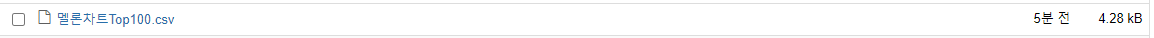

### Question 05

In [17]:
import time

In [18]:
url = 'https://www.hsd.co.kr/menu/menu_list'
driver = wb.Chrome()
driver.get(url)

In [19]:
try:
    while True:
        driver.find_element(By.CSS_SELECTOR, value='.c_05').click()
        time.sleep(1)
except:
    print('더 보기 클릭 완료!')

더 보기 클릭 완료!


In [20]:
all_menu = driver.find_elements(By.CSS_SELECTOR, value = '.item-text')
menu = driver.find_elements(By.CSS_SELECTOR, value = '.item-text > .fz_03')
price = driver.find_elements(By.CSS_SELECTOR, value = '.item-price > strong')

In [21]:
han = []
sot = []


for i in menu:
    han.append(i.text)
    
for i in price:
    sot.append(i.text)

In [22]:
hansot = {'메뉴명': han, '가격': sot}
hansot_df = pd.DataFrame(hansot)
hansot_df

,메뉴명,가격
0,[반찬] 사골 우거지 곰탕,"4,900"
1,[착한도시락] 참치야채 감초고추장 사골 우거지 곰탕 정식,"7,500"
2,[착한도시락] 빅치킨마요 사골 우거지 곰탕 정식,"7,900"
3,[착한도시락] 제육 사골 우거지 곰탕 정식,"8,900"
4,[착한도시락] 사골 우거지 곰탕,"6,500"
...,...,...
86,무말랭이 무침,400
87,한솥밥,"1,000"
88,현미밥,"1,700"
89,리얼 티라미수 찰떡,"1,500"


In [23]:
# csv 저장
# hansot_df.to_csv('경로 및 파일명.csv', index = 'True or False')
hansot_df.to_csv('./한솥메뉴.csv', index = 'True')

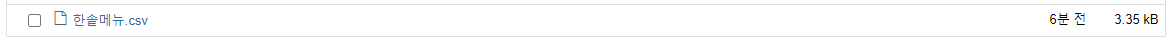